[[215 215 215 ...  30  30  30]
 [215 215 215 ...  30  30  30]
 [215 215 215 ...  30  30  30]
 ...
 [215 215 215 ... 215 215 215]
 [215 215 215 ... 215 215 215]
 [215 215 215 ... 215 215 215]]
binary_image


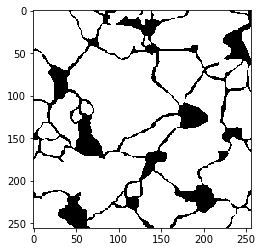

物体の数: 21
colored_image


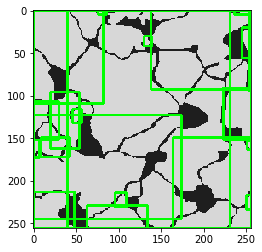

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# image = cv2.imread('../tmp/Label_Mask_No_1.png')
gray = cv2.imread("../tmp/Label_Mask_No_1.png", cv2.IMREAD_GRAYSCALE)

print(gray)

# _, binary_image = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# 二値化処理を行う
# _, binary_image = cv2.threshold(gray, 30, 215, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

_, binary_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# inverted_image
binary_image = cv2.bitwise_not(binary_image)

print("binary_image")
plt.imshow(binary_image, cmap="gray")
plt.show()


# ラベリング処理を行う
_, labeled_image, stats, centroids = cv2.connectedComponentsWithStats(
    binary_image, connectivity=8
)

# 背景はラベル0としてカウントされるため、物体数はラベルの総数から1を引いたものになります
object_count = len(stats) - 1

print(f"物体の数: {object_count}")

# ラベリングされた画像に物体の位置を表示する
colored_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

for label in range(1, object_count + 1):
    # 各物体のバウンディングボックスを取得
    x, y, w, h, _ = stats[label]

    # バウンディングボックスの左上と右下に矩形を描画
    cv2.rectangle(colored_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 物体の位置を表示した画像を表示
# print('image')
# plt.imshow(image, cmap='gray')
# plt.show()

print("======================")

print("colored_image")
plt.imshow(colored_image)
plt.show()

# 組織の抽出

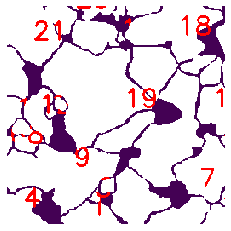

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む（カラー画像を想定）
image = cv2.imread("../tmp/Label_Mask_No_1.png")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭を描画したカラー画像を作成
colored_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 各輪郭に番号を振りながら描画
for i, contour in enumerate(contours):
    # 各輪郭の中心を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 各輪郭を描画（白色で塗りつぶす）
    cv2.drawContours(
        colored_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED
    )

    # 画像に番号を描画
    cv2.putText(
        colored_image, str(i + 1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2
    )

# 画像をMatplotlibを使用して表示
plt.imshow(colored_image)
plt.axis("off")
plt.show()

# 粒界の削除 - オープニングと小さい面積の削除

gray_image


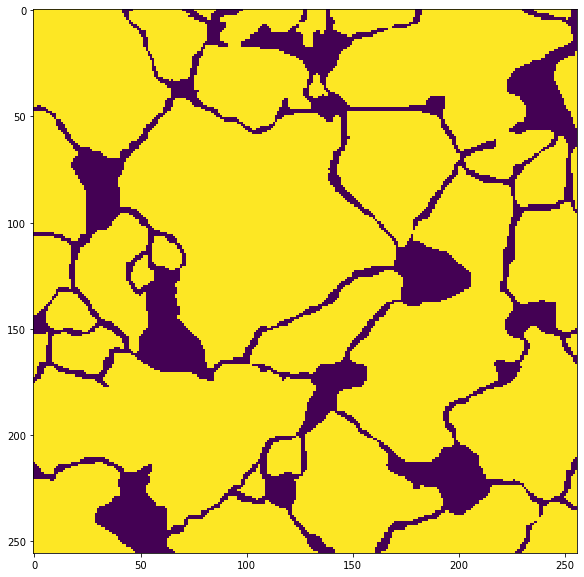

eroded_image


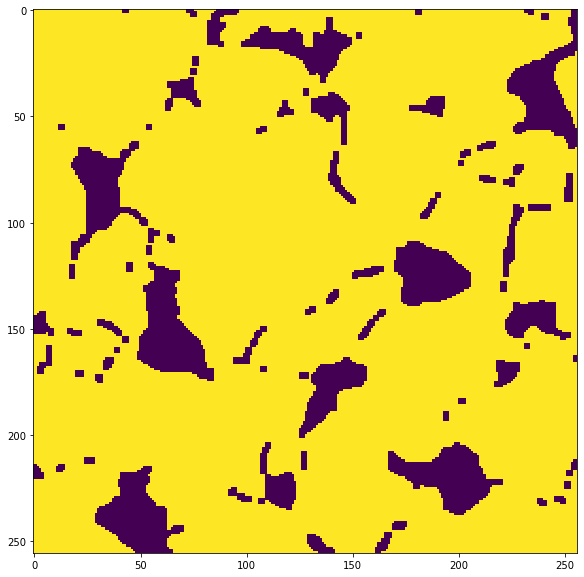

70 result_image


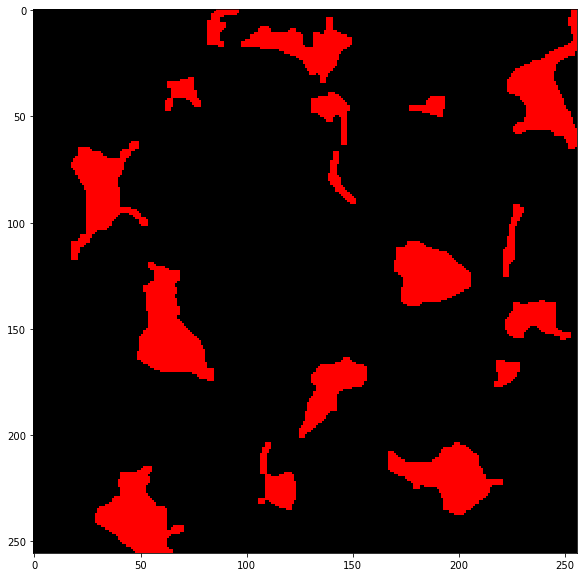

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/Label_Mask_No_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
# binary_image = cv2.bitwise_not(binary_image)


# 膨張と収縮を適用して細い線を削除
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

print("eroded_image")
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image)
plt.show()

# 輪郭を検出
eroded_image = cv2.bitwise_not(eroded_image)
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
# min_contour_area = 50
# filtered_contours = [contour for contour in contours if cv2.contourArea(contour) >= min_contour_area]

# # 結果を描画
# result_image = np.zeros_like(image)
# cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

# print('50 result_image')
# plt.figure(figsize=(10, 10))
# plt.imshow(result_image)
# plt.show()

min_contour_area = 70
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) >= min_contour_area
]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

print("70 result_image")
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

### フェライトの解析

row_image


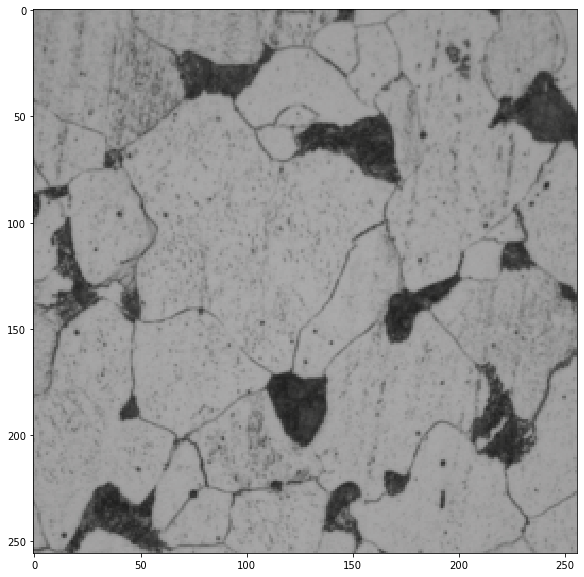

row_image


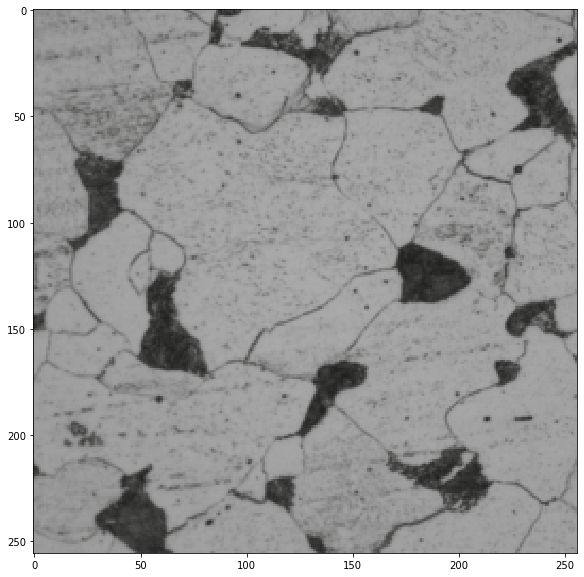

gray_image


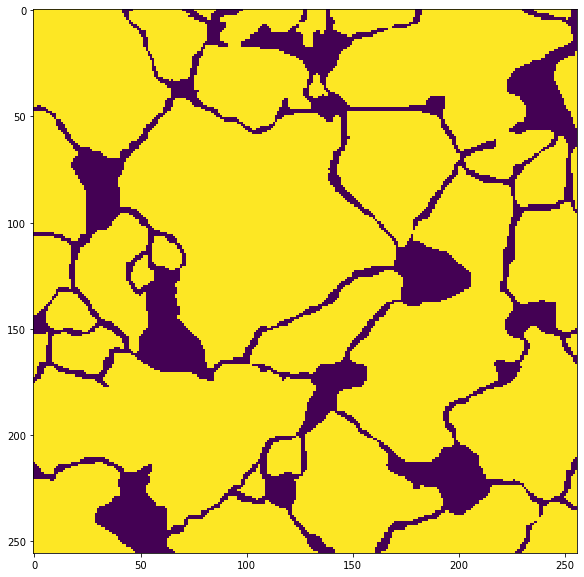

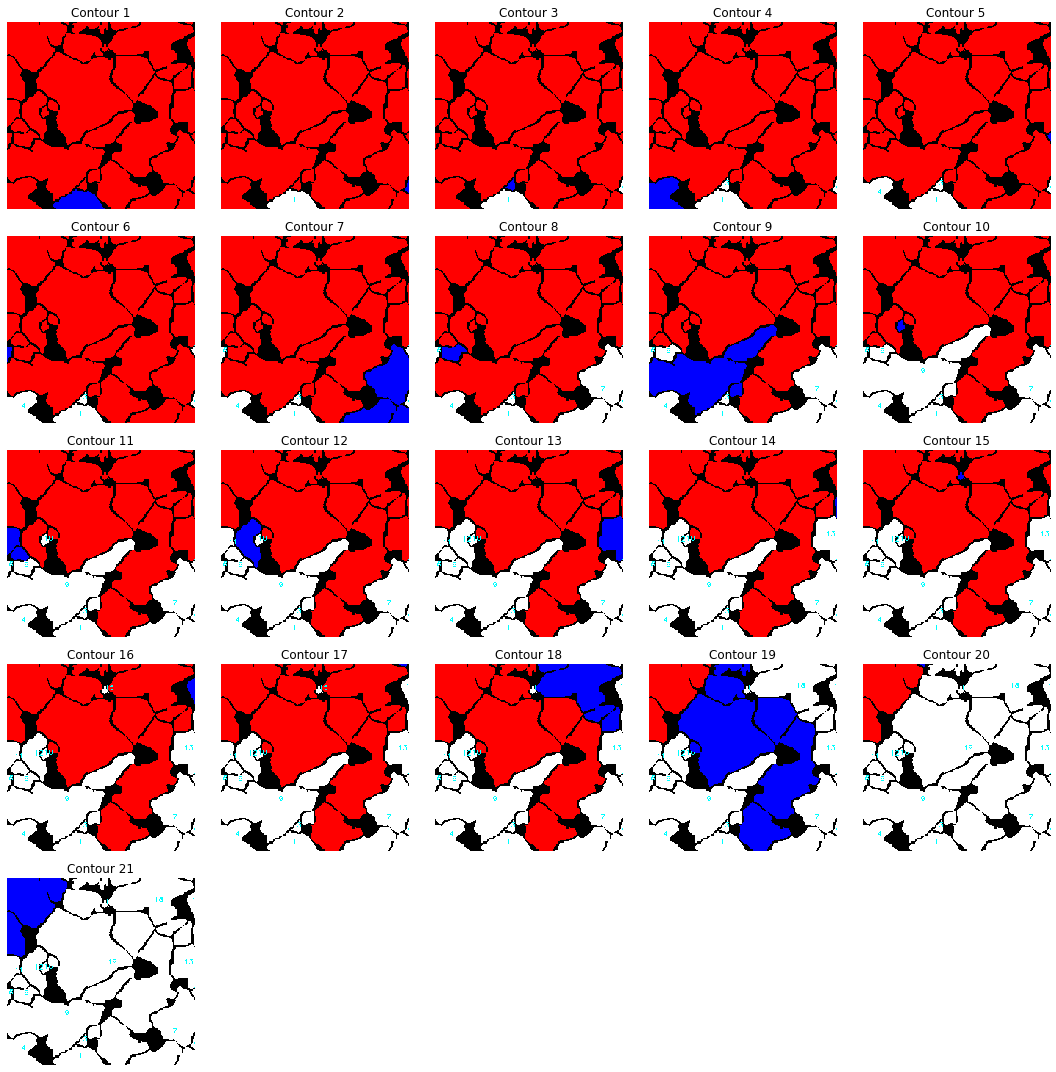

輪郭の個数: 21
各輪郭の周の長さ: [172.56854128837585, 36.72792184352875, 46.627416372299194, 184.9116871356964, 23.656854152679443, 49.071067690849304, 514.0903995037079, 99.59797894954681, 696.6416960954666, 41.79898953437805, 171.05382299423218, 181.9238796234131, 171.5979789495468, 57.65685415267944, 32.97056245803833, 80.62741661071777, 37.071067690849304, 627.1025923490524, 1753.8001991510391, 22.485281229019165, 479.56348872184753]
各輪郭の面積: [1158.0, 37.5, 89.0, 1387.0, 22.0, 74.5, 4586.5, 456.0, 7819.0, 92.0, 744.0, 1238.5, 1356.0, 33.0, 44.0, 193.0, 33.5, 5546.0, 21699.5, 19.0, 5069.0]
各輪郭の面積(合計): 51697.0


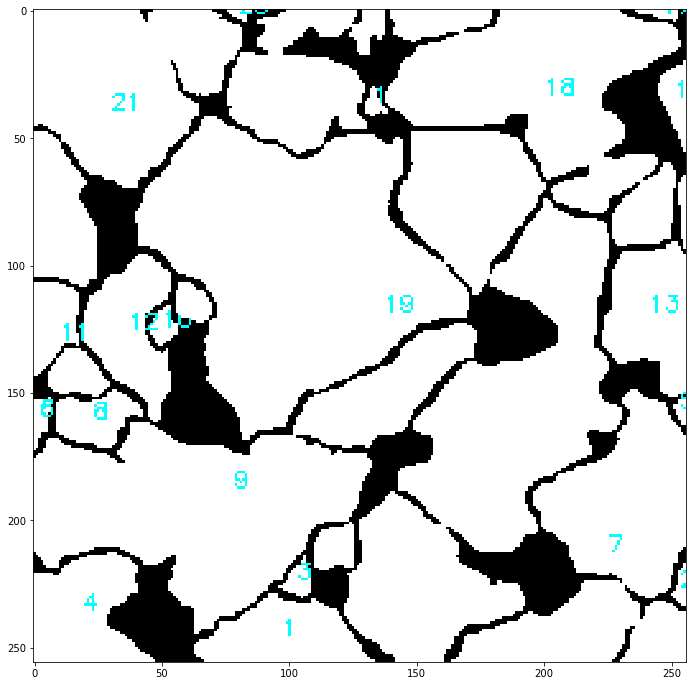

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/Label_Mask_No_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

row_image = cv2.imread("../tmp/Input_Image_No_1.png")
print("row_image")
plt.figure(figsize=(10, 10))
plt.imshow(row_image)
plt.show()

# row_image = cv2.flip(row_image, 0)
row_image = cv2.flip(row_image, 1)
row_image = cv2.rotate(row_image, cv2.ROTATE_90_COUNTERCLOCKWISE)

print("row_image")
plt.figure(figsize=(10, 10))
plt.imshow(row_image)
plt.show()

cv2.imwrite("./../tmp/fix/fix_input_1.png", row_image)


print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭の個数
contour_count = len(contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in contours]
contour_areas = [cv2.contourArea(contour) for contour in contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
font_thickness = 1

num_columns = 5
num_rows = (contour_count + num_columns - 1) // num_columns

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(15, 15))

for i, contour in enumerate(contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 各輪郭を描画（青で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED)

    # 表示
    # plt.figure(figsize=(10, 10))
    # plt.imshow(result_image)
    # plt.axis('off')
    # plt.title(f'Contour {i+1}')
    # plt.show()

    # 1列に5枚表示
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(result_image)
    plt.axis("off")
    plt.title(f"Contour {i+1}")

    # 各輪郭を描画（白色で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

plt.tight_layout()
plt.show()

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")


plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.show()
#

gray_image


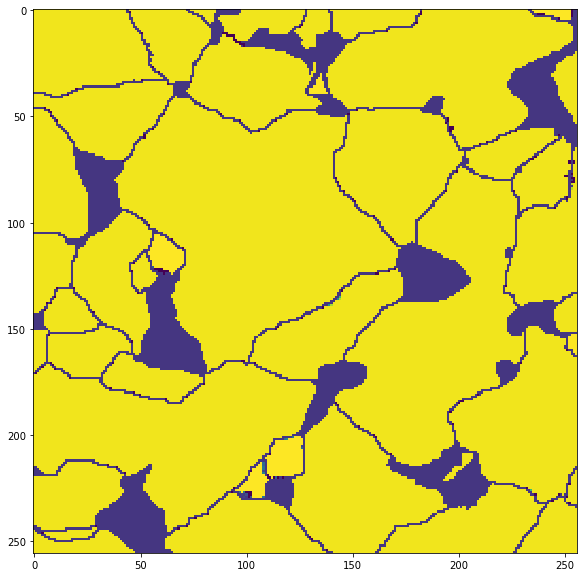

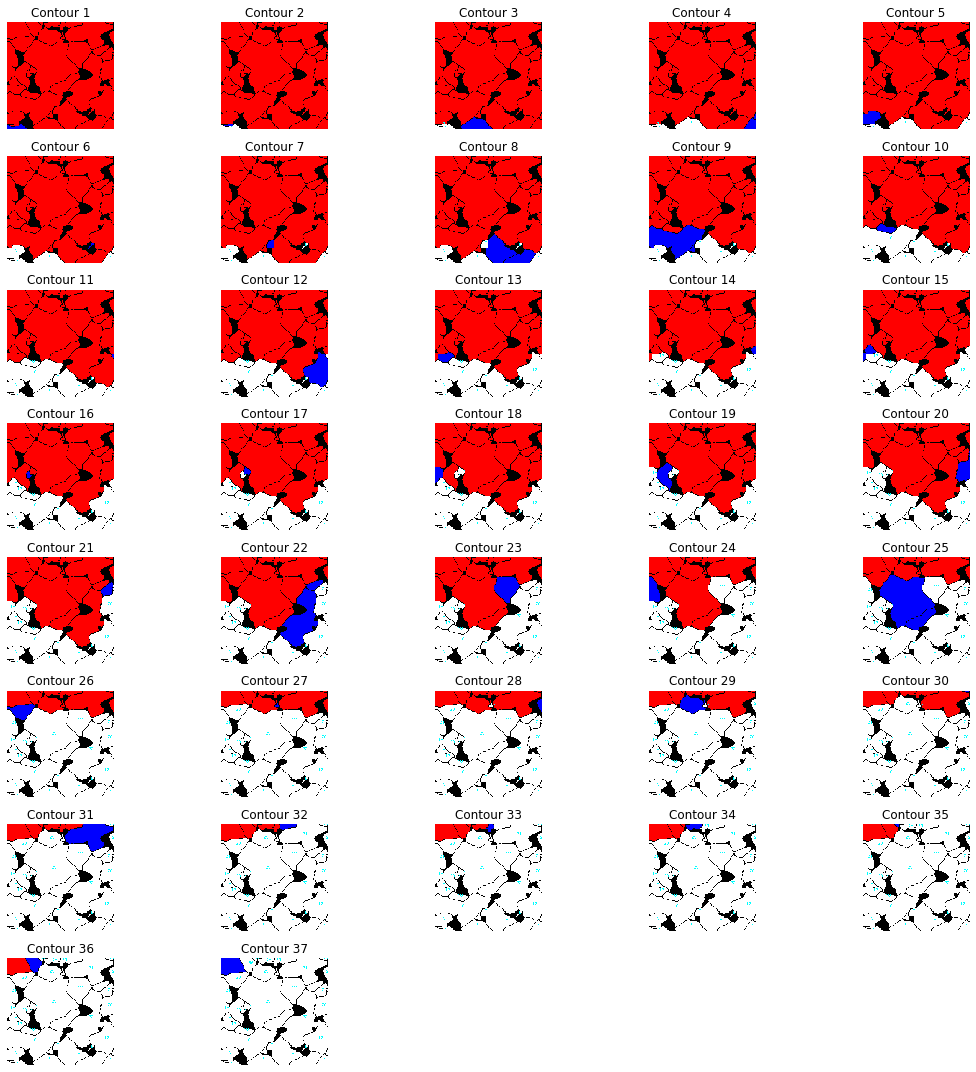

輪郭の個数: 37
各輪郭の周の長さ: [113.69848394393921, 52.72792184352875, 178.81118190288544, 129.59797930717468, 133.0121922492981, 41.2132031917572, 65.21320307254791, 435.9898945093155, 474.9604569673538, 115.49747347831726, 22.242640614509583, 248.16652023792267, 107.59797883033752, 48.14213526248932, 123.84061968326569, 46.28427064418793, 55.11269795894623, 101.21320295333862, 186.99494683742523, 203.7401144504547, 106.91168713569641, 589.91377389431, 208.40916097164154, 154.7695518732071, 680.0386642217636, 175.5391035079956, 29.899494767189026, 76.87005710601807, 194.99494767189026, 39.65685415267944, 340.8355668783188, 99.79898929595947, 60.041630148887634, 100.52691113948822, 29.313708305358887, 126.22539556026459, 185.5979790687561]
各輪郭の面積: [271.5, 59.5, 1253.5, 483.0, 979.5, 32.5, 243.5, 4094.0, 5710.0, 540.5, 20.5, 2920.0, 590.0, 132.0, 413.5, 110.0, 181.0, 483.5, 1343.0, 1273.0, 553.0, 6508.5, 2452.5, 1121.0, 10997.0, 1360.0, 30.5, 204.5, 1640.0, 40.0, 4291.5, 358.0, 166.5, 360.5, 28.0,

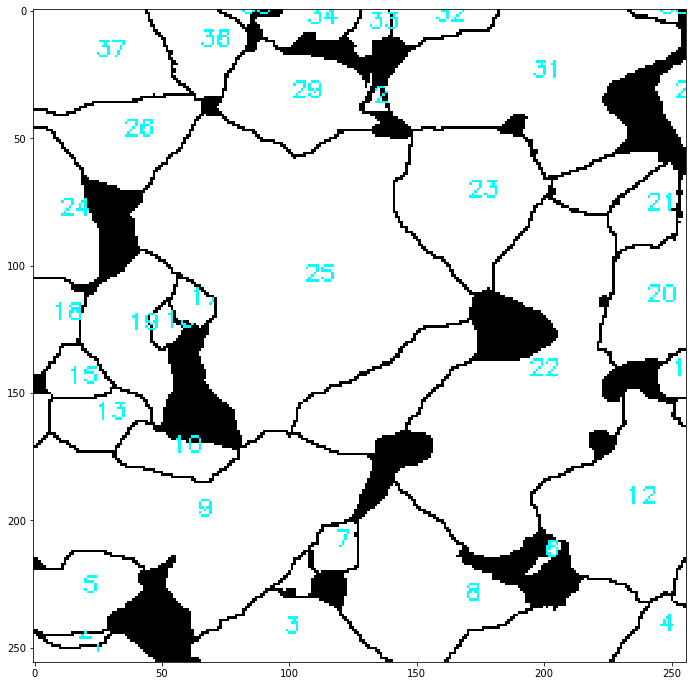

In [58]:
# photoshop作成mask画像

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/fix/fix_mask_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 輪郭を検出
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭の個数
contour_count = len(contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in contours]
contour_areas = [cv2.contourArea(contour) for contour in contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
font_thickness = 1

num_columns = 5
num_rows = (contour_count + num_columns - 1) // num_columns

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(15, 15))

for i, contour in enumerate(contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 各輪郭を描画（青で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED)

    # 1列に5枚表示
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(result_image)
    plt.axis("off")
    plt.title(f"Contour {i+1}")

    # 各輪郭を描画（白色で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

plt.tight_layout()
plt.show()

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")


plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.show()

gray_image


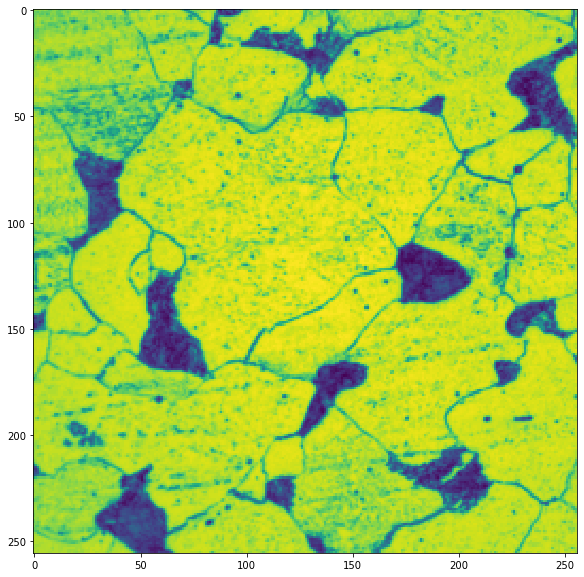

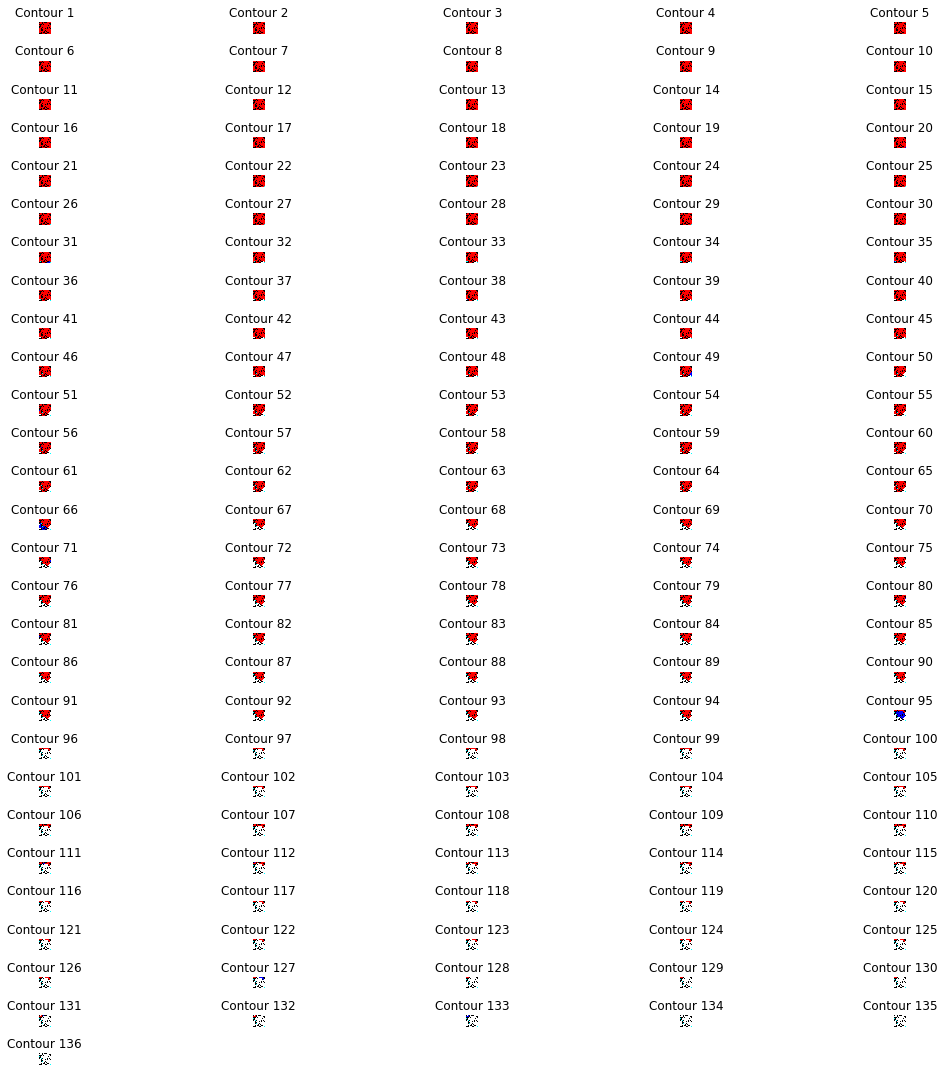

輪郭の個数: 136
各輪郭の周の長さ: [19.071067690849304, 3.414213538169861, 94.76955187320709, 14.828427076339722, 12.242640614509583, 0.0, 79.25483322143555, 0.0, 0.0, 3.414213538169861, 0.0, 6.2426406145095825, 3.414213538169861, 3.414213538169861, 32.38477599620819, 46.62741661071777, 2.0, 2.0, 0.0, 95.35533833503723, 5.414213538169861, 11.656854152679443, 79.25483322143555, 0.0, 6.828427076339722, 6.2426406145095825, 23.899494767189026, 0.0, 7.414213538169861, 7.656854152679443, 200.50966620445251, 4.828427076339722, 30.14213538169861, 2.0, 84.42640614509583, 6.828427076339722, 5.414213538169861, 82.76955199241638, 0.0, 0.0, 8.242640614509583, 35.55634891986847, 0.0, 15.071067690849304, 16.82842707633972, 4.0, 115.15432786941528, 46.485281229019165, 276.208150267601, 2.0, 68.76955163478851, 19.656854152679443, 10.242640614509583, 42.38477599620819, 0.0, 38.97056233882904, 20.485281229019165, 4.0, 33.79898953437805, 52.870057225227356, 0.0, 0.0, 0.0, 6.828427076339722, 4.0, 1658.1849749088287, 4.8

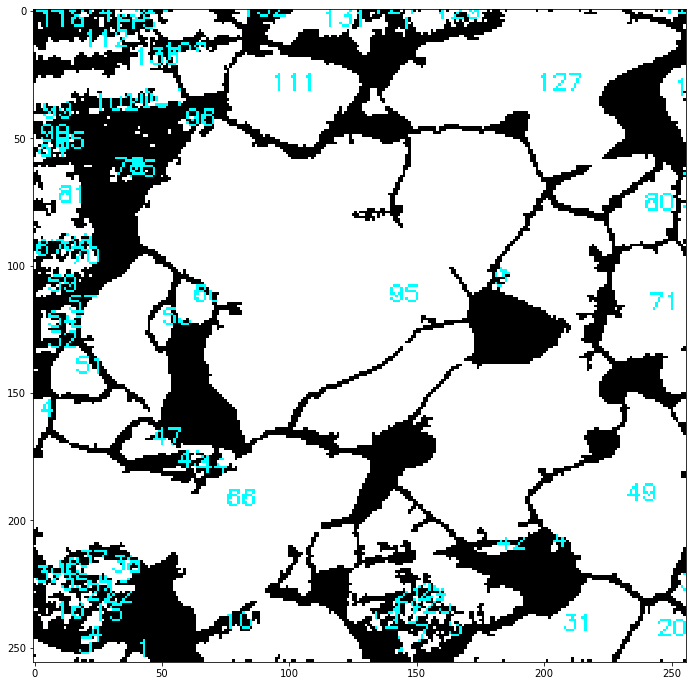

In [78]:
# 単純な二値化画像での解析

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/fix/fix_input_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# 輪郭を検出
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 輪郭の個数
contour_count = len(contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in contours]
contour_areas = [cv2.contourArea(contour) for contour in contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
font_thickness = 1

num_columns = 5
num_rows = (contour_count + num_columns - 1) // num_columns

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(15, 15))

for i, contour in enumerate(contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 各輪郭を描画（青で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (0, 0, 255), thickness=cv2.FILLED)

    # 1列に5枚表示
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(result_image)
    plt.axis("off")
    plt.title(f"Contour {i+1}")

    # 各輪郭を描画（白色で塗りつぶす）
    cv2.drawContours(result_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

plt.tight_layout()
plt.show()

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")


plt.figure(figsize=(12, 12))
plt.imshow(result_image)
plt.show()
#

### パーライトの解析

gray_image


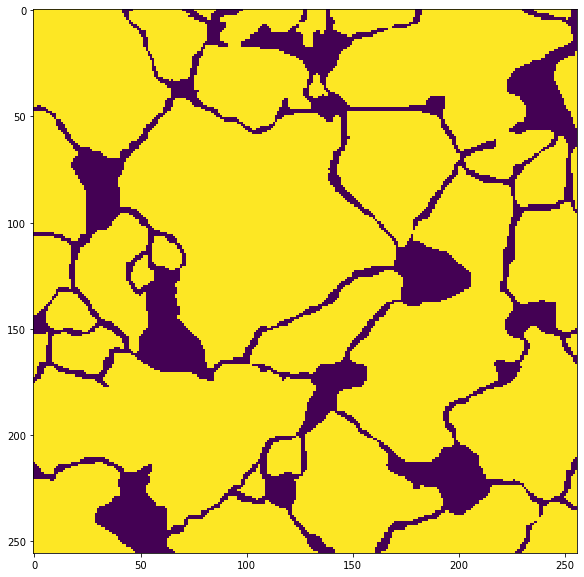

輪郭の個数: 17
各輪郭の周の長さ: [155.0538226366043, 157.88224959373474, 100.28427076339722, 42.72792172431946, 117.74011433124542, 95.35533833503723, 169.88224971294403, 112.66904640197754, 76.3847758769989, 61.69848442077637, 202.61017167568207, 45.899494767189026, 78.04163026809692, 65.79898941516876, 163.63960909843445, 202.6101713180542, 64.97056233882904]
各輪郭の面積: [824.0, 819.0, 225.0, 89.5, 477.0, 303.5, 958.0, 728.5, 101.5, 78.5, 714.5, 79.5, 172.5, 116.0, 540.5, 810.5, 105.0]
各輪郭の面積(合計): 7143.0


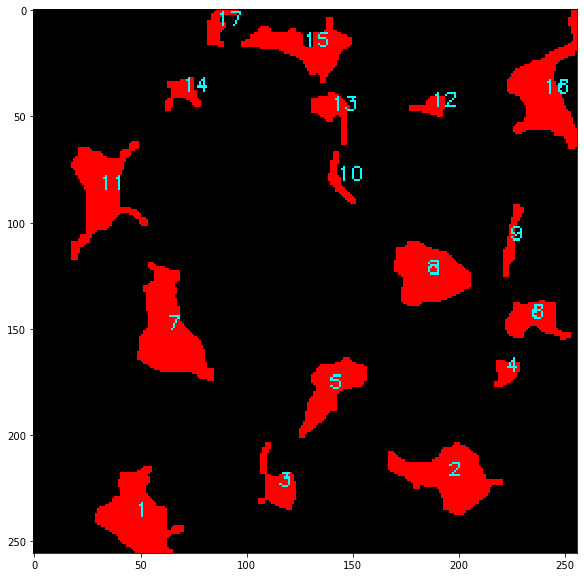

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/Label_Mask_No_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 膨張と収縮を適用して細い線を削除
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 輪郭を検出
eroded_image = cv2.bitwise_not(eroded_image)
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
min_contour_area = 70
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) >= min_contour_area
]

# 輪郭の個数
contour_count = len(filtered_contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in filtered_contours]
contour_areas = [cv2.contourArea(contour) for contour in filtered_contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
# font_color = (255, 255, 255)  # 青色
font_thickness = 1

for i, contour in enumerate(filtered_contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

gray_image


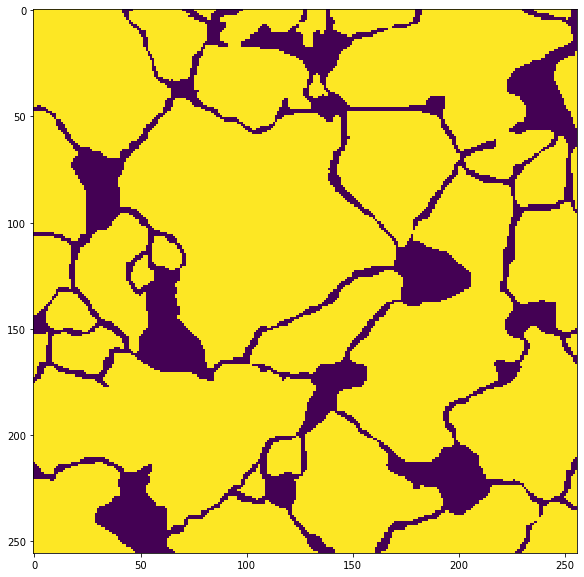

binary_image


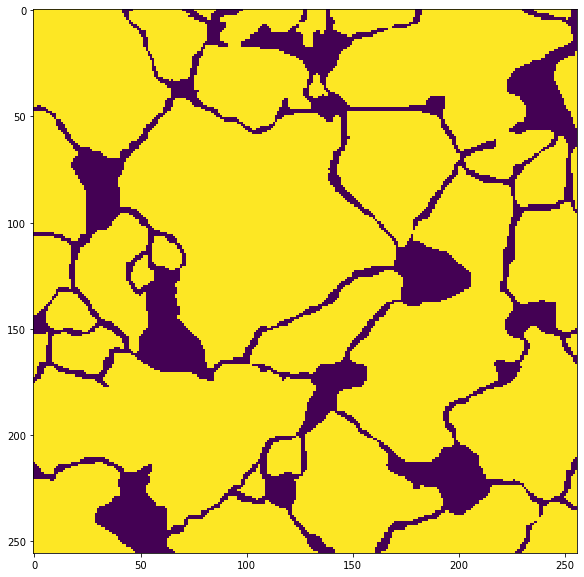

eroded_image


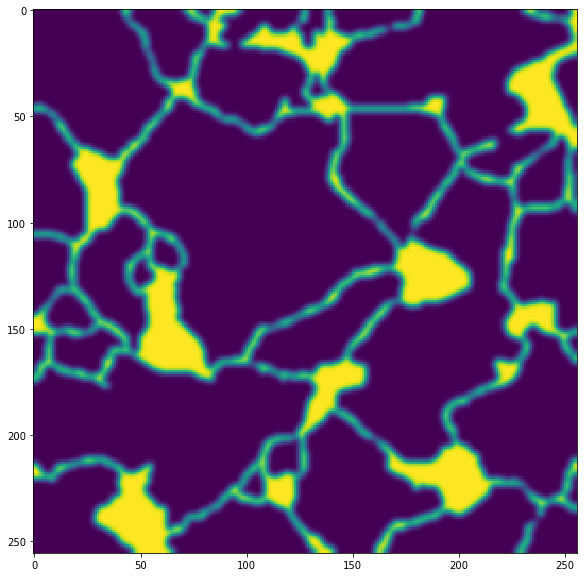

eroded_image 2


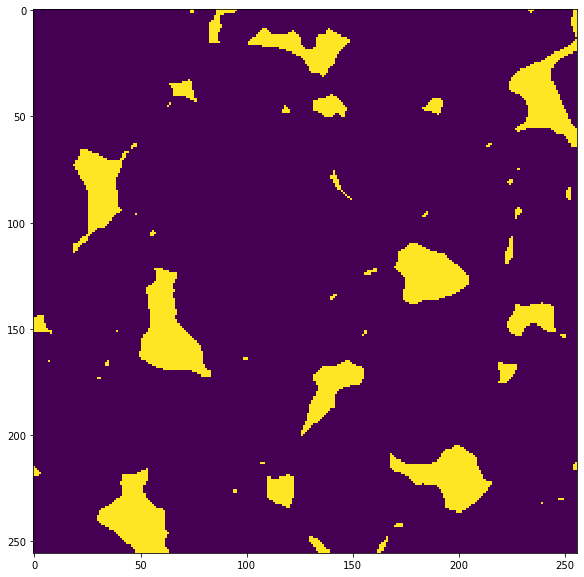

輪郭の個数: 16
各輪郭の周の長さ: [49.55634891986847, 128.22539567947388, 136.9533166885376, 31.313708305358887, 107.9827550649643, 29.071067690849304, 71.69848430156708, 153.05382251739502, 103.74011468887329, 145.2964630126953, 26.14213538169861, 44.041630268096924, 38.14213538169861, 166.26702547073364, 131.53910315036774, 52.14213538169861]
各輪郭の面積: [138.5, 690.0, 668.5, 47.0, 362.5, 32.5, 204.5, 784.0, 614.0, 513.5, 35.0, 98.5, 56.0, 633.5, 389.0, 56.0]
各輪郭の面積(合計): 5323.0


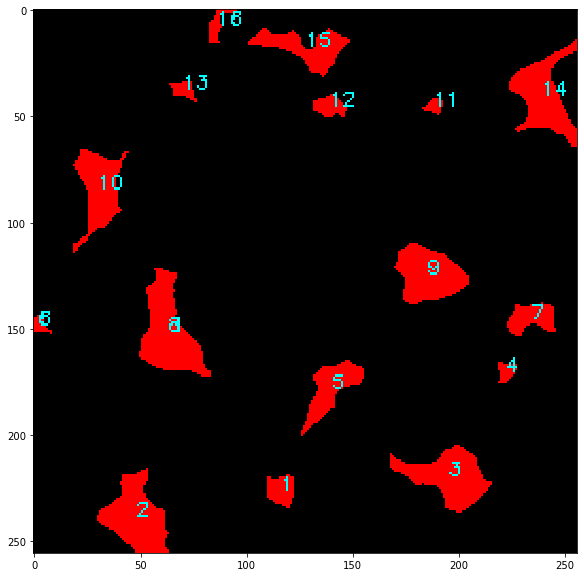

In [41]:
# ガウシアンノイズ適応

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/Label_Mask_No_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

print("binary_image")
plt.figure(figsize=(10, 10))
plt.imshow(binary_image)
plt.show()

binary_image = cv2.bitwise_not(binary_image)
eroded_image = cv2.GaussianBlur(binary_image, (7, 7), 0)

print("eroded_image")
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image)
plt.show()

# さらに二値化
_, eroded_image = cv2.threshold(eroded_image, 200, 255, cv2.THRESH_BINARY)

print("eroded_image 2")
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image)
plt.show()


# 輪郭を検出
# eroded_image = cv2.bitwise_not(eroded_image)
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
# FIX：面積を変更
min_contour_area = 30
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) >= min_contour_area
]

# 輪郭の個数
contour_count = len(filtered_contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in filtered_contours]
contour_areas = [cv2.contourArea(contour) for contour in filtered_contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
font_thickness = 1

for i, contour in enumerate(filtered_contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

gray_image


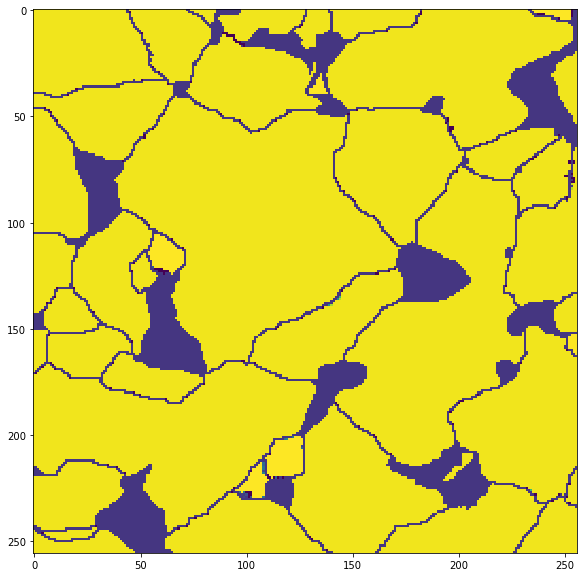

輪郭の個数: 12
各輪郭の周の長さ: [48.14213538169861, 134.81118190288544, 177.19595766067505, 36.14213538169861, 111.74011445045471, 87.35533845424652, 155.88224935531616, 105.84061968326569, 115.8406195640564, 46.38477599620819, 139.15432751178741, 194.02438461780548]
各輪郭の面積: [147.0, 724.5, 622.0, 79.0, 426.0, 264.5, 820.0, 648.5, 536.5, 103.5, 417.5, 745.0]
各輪郭の面積(合計): 5534.0


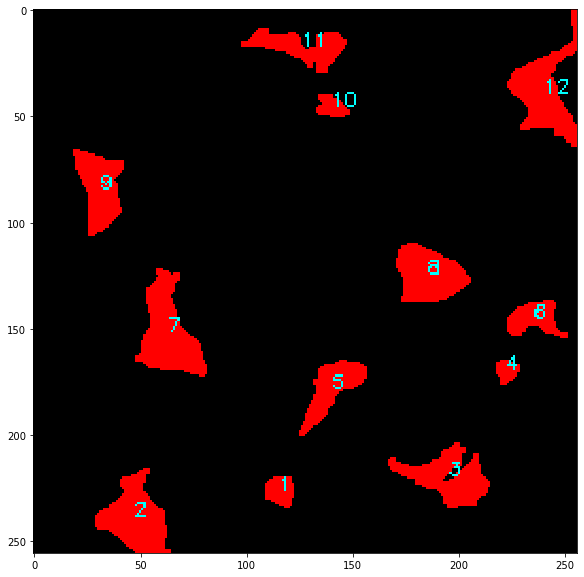

In [72]:
# photoshop作成mask画像
# 収縮・拡張の適応

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/fix/fix_mask_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 膨張と収縮を適用して細い線を削除
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)


# 輪郭を検出
eroded_image = cv2.bitwise_not(eroded_image)
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
min_contour_area = 70
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) >= min_contour_area
]

# 輪郭の個数
contour_count = len(filtered_contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in filtered_contours]
contour_areas = [cv2.contourArea(contour) for contour in filtered_contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
# font_color = (255, 255, 255)  # 青色
font_thickness = 1

for i, contour in enumerate(filtered_contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

gray_image


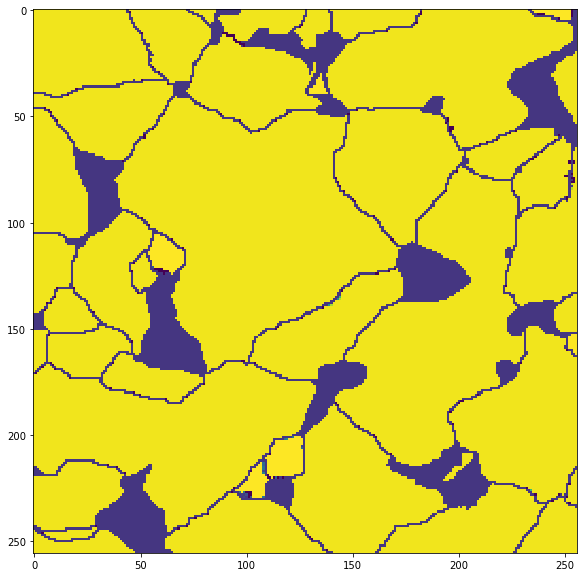

binary_image


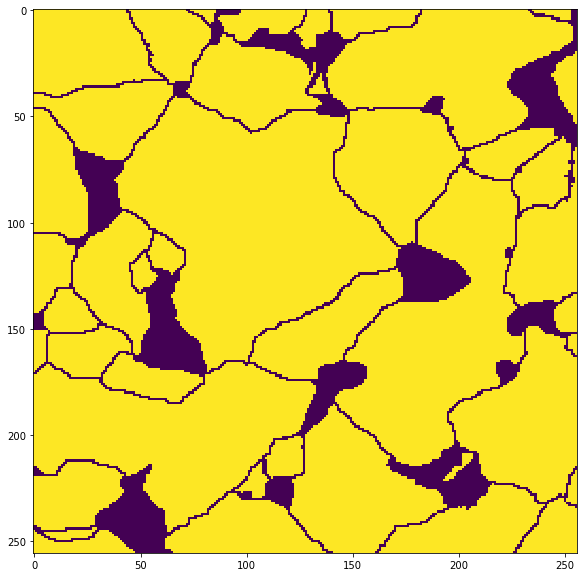

eroded_image


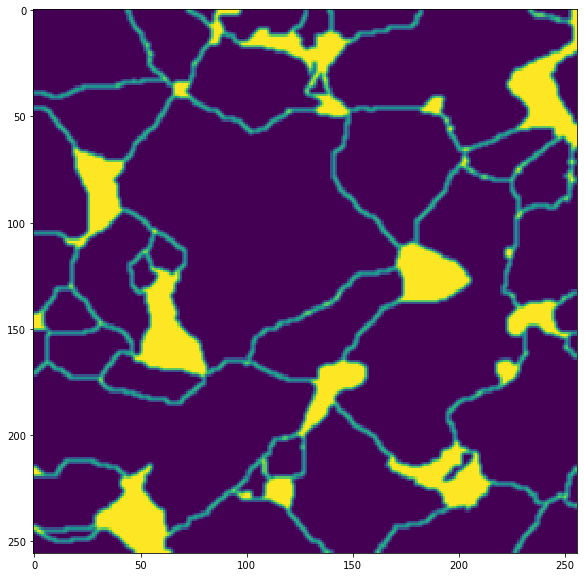

eroded_image 2


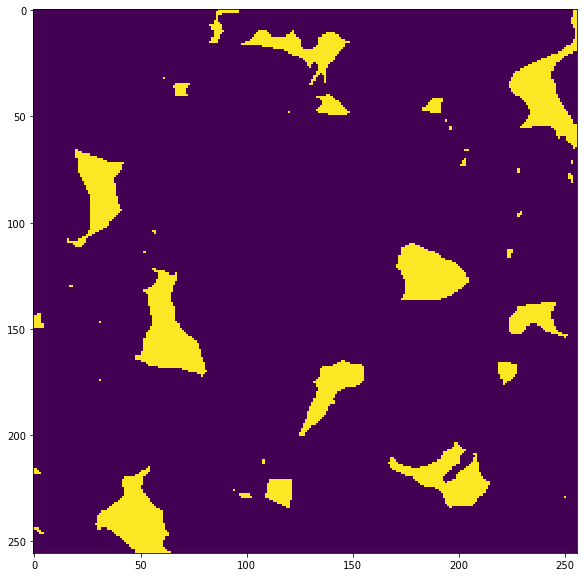

filtered_contours_image


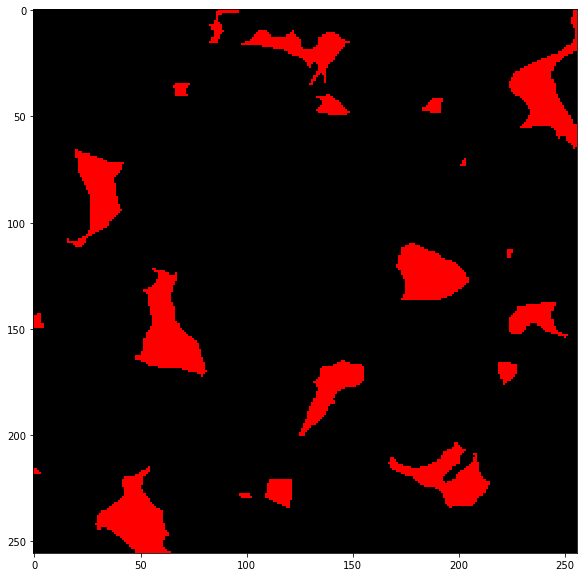

輪郭の個数: 20
各輪郭の周の長さ: [10.828427076339722, 45.31370830535889, 8.828427076339722, 137.53910326957703, 174.40916073322296, 31.313708186149597, 111.39696860313416, 18.82842707633972, 84.76955187320709, 158.71067678928375, 9.41421353816986, 102.66904675960541, 8.828427076339722, 139.63960897922516, 26.485281229019165, 44.041630029678345, 23.071067690849304, 160.8528118133545, 195.9238796234131, 57.21320307254791]
各輪郭の面積: [4.0, 117.0, 4.0, 661.0, 528.5, 56.0, 364.0, 18.0, 209.0, 723.0, 4.5, 582.5, 3.0, 473.5, 34.0, 77.5, 23.5, 346.0, 650.5, 43.5]
各輪郭の面積(合計): 4923.0


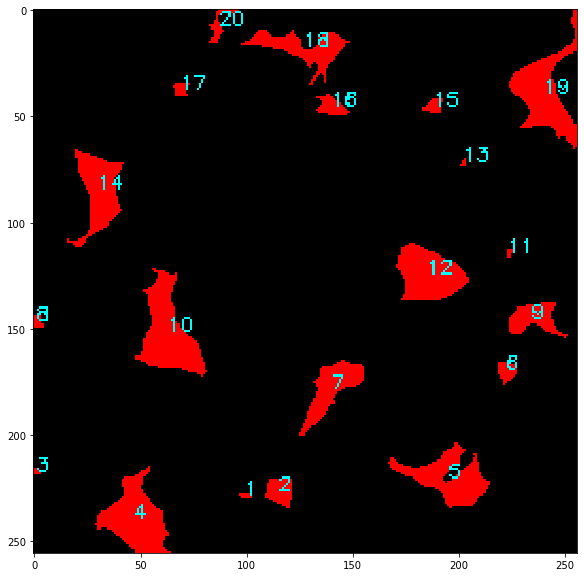

In [39]:
# photoshop作成mask画像
# ガウスノイズの適応

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/fix/fix_mask_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

print("binary_image")
plt.figure(figsize=(10, 10))
plt.imshow(binary_image)
plt.show()

binary_image = cv2.bitwise_not(binary_image)
eroded_image = cv2.GaussianBlur(binary_image, (3, 3), 0)

print("eroded_image")
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image)
plt.show()

# さらに二値化
_, eroded_image = cv2.threshold(eroded_image, 200, 255, cv2.THRESH_BINARY)

print("eroded_image 2")
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image)
plt.show()

# 輪郭を検出
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
min_contour_area = 3
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) >= min_contour_area
]

# filtered_contours後画像
filtered_contours_image = np.zeros_like(image)
cv2.drawContours(
    filtered_contours_image, filtered_contours, -1, 255, thickness=cv2.FILLED
)

_, filtered_contours_image = cv2.threshold(
    filtered_contours_image, 128, 255, cv2.THRESH_BINARY
)

print("filtered_contours_image")
plt.figure(figsize=(10, 10))
plt.imshow(filtered_contours_image)
plt.show()

# 輪郭の個数
contour_count = len(filtered_contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in filtered_contours]
contour_areas = [cv2.contourArea(contour) for contour in filtered_contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
# font_color = (255, 255, 255)  # 青色
font_thickness = 1

for i, contour in enumerate(filtered_contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

sum_areas = 0
for area in contour_areas:
    sum_areas += area

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

gray_image


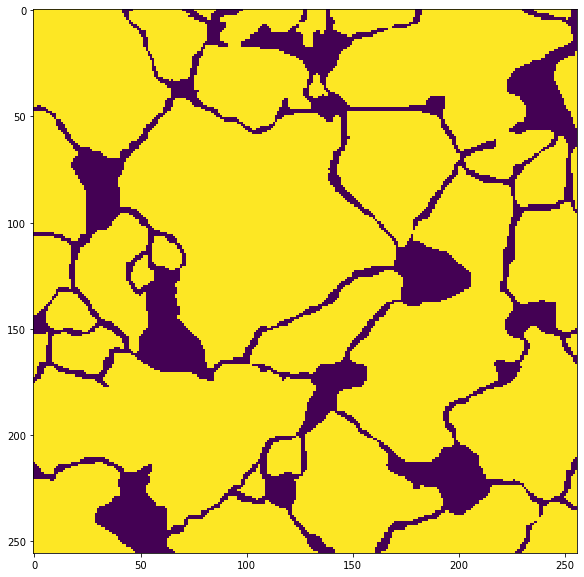

Contour 0 - Aspect Ratio: 1.02
Contour 1 - Aspect Ratio: 1.59
Contour 2 - Aspect Ratio: 0.56
Contour 3 - Aspect Ratio: 0.92
Contour 4 - Aspect Ratio: 0.84
Contour 5 - Aspect Ratio: 1.63
Contour 6 - Aspect Ratio: 0.64
Contour 7 - Aspect Ratio: 1.16
Contour 8 - Aspect Ratio: 0.29
Contour 8 - Aspect Ratio: 0.52
Contour 9 - Aspect Ratio: 0.64
Contour 10 - Aspect Ratio: 1.70
Contour 11 - Aspect Ratio: 0.72
Contour 12 - Aspect Ratio: 1.06
Contour 13 - Aspect Ratio: 1.68
Contour 14 - Aspect Ratio: 0.50
Contour 15 - Aspect Ratio: 0.83
輪郭の個数: 16
各輪郭の周の長さ: [155.0538226366043, 157.88224959373474, 100.28427076339722, 42.72792172431946, 117.74011433124542, 95.35533833503723, 169.88224971294403, 112.66904640197754, 61.69848442077637, 202.61017167568207, 45.899494767189026, 78.04163026809692, 65.79898941516876, 163.63960909843445, 202.6101713180542, 64.97056233882904]
各輪郭の面積: [824.0, 819.0, 225.0, 89.5, 477.0, 303.5, 958.0, 728.5, 78.5, 714.5, 79.5, 172.5, 116.0, 540.5, 810.5, 105.0]
各輪郭の面積(合計): 7041

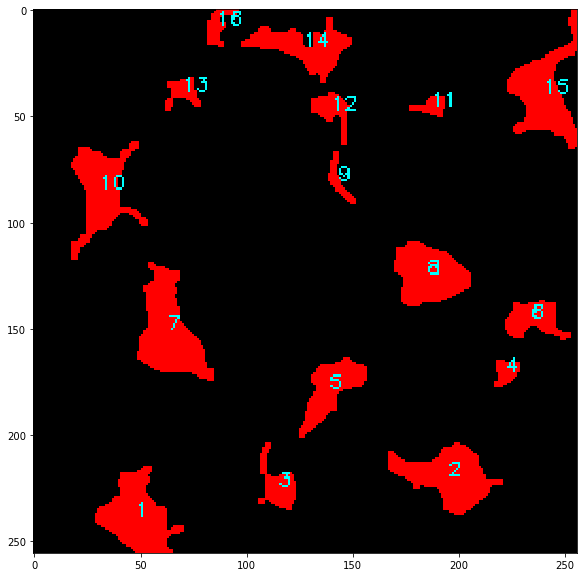

In [53]:
# タテヨコ比で削除

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込む
image = cv2.imread("../tmp/Label_Mask_No_1.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("gray_image")
plt.figure(figsize=(10, 10))
plt.imshow(gray_image)
plt.show()

# 二値化処理を行う
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# 膨張と収縮を適用して細い線を削除
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 輪郭を検出
eroded_image = cv2.bitwise_not(eroded_image)
contours, _ = cv2.findContours(eroded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が閾値未満の輪郭を削除
min_contour_area = 70
min_aspect_ratio = 0.3

filtered_contours = []
for contour in contours:
    area = cv2.contourArea(contour)
    if area >= min_contour_area:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = float(w) / h if h != 0 else 0
        print(f"Contour {len(filtered_contours)} - Aspect Ratio: {aspect_ratio:.2f}")
        if aspect_ratio >= min_aspect_ratio:
            filtered_contours.append(contour)

# 輪郭の個数
contour_count = len(filtered_contours)

# 各輪郭の周の長さと面積を取得
contour_lengths = [cv2.arcLength(contour, closed=True) for contour in filtered_contours]
contour_areas = [cv2.contourArea(contour) for contour in filtered_contours]

# 結果を描画
result_image = np.zeros_like(image)
cv2.drawContours(result_image, filtered_contours, -1, 255, thickness=cv2.FILLED)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.3
font_color = (0, 255, 255)  # 青色
font_thickness = 1

for i, contour in enumerate(filtered_contours):
    # 輪郭の中心座標を計算
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # 番号を輪郭の中心に配置
    cv2.putText(
        result_image, str(i + 1), (cX, cY), font, font_scale, font_color, font_thickness
    )

sum_areas = sum(contour_areas)

print(f"輪郭の個数: {contour_count}")
print(f"各輪郭の周の長さ: {contour_lengths}")
print(f"各輪郭の面積: {contour_areas}")
print(f"各輪郭の面積(合計): {sum_areas}")

plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.show()

### fix picture

before image


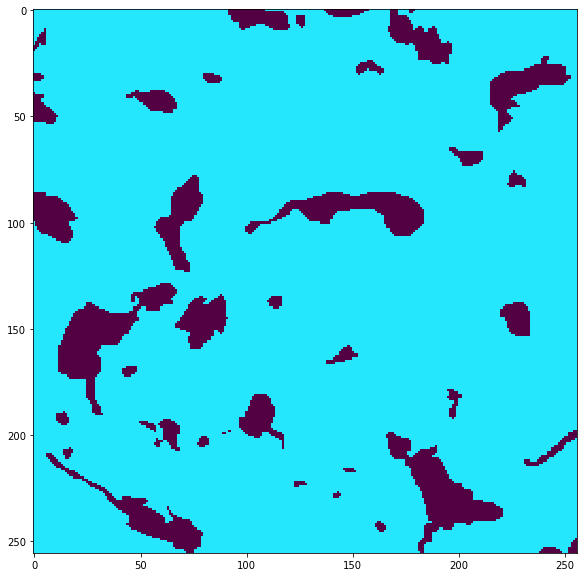

after image


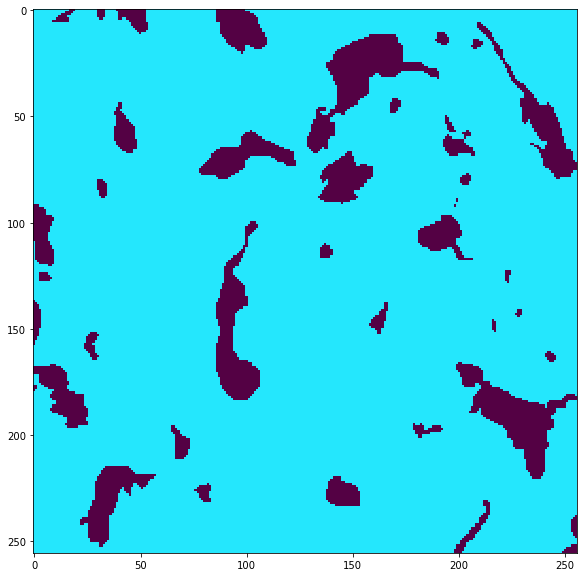

True

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


row_image = cv2.imread("../tmp/Input_Image_No_49.png")
# print('row_image')
# plt.figure(figsize=(10, 10))
# plt.imshow(row_image)
# plt.show()

image = cv2.imread("../tmp/fix/Label_Mask_No_49.png")


print("before image")
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# image = cv2.flip(image, 0)
# image = cv2.flip(image, 1)
# image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
# image = cv2.flip(image, 0)

image = np.flipud(np.fliplr(image))
image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
image = cv2.flip(image, 1)

print("after image")
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# cv2.imwrite('./../tmp/fix/fix_Label_49.png', image)

## IoU

In [73]:
import cv2

# 2枚の画像を読み込む
image1 = cv2.imread("../tmp/fix/fix_mask_1.png")
image2 = cv2.imread("../tmp/Label_Mask_No_1.png")


# 画像の高さと幅を取得
height, width, _ = image1.shape

# 画像をグレースケールに変換
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# 2つの画像の重なり領域を求める
intersection = cv2.bitwise_and(gray1, gray2)

# 重なり領域の面積を計算
intersection_area = (
    np.sum(intersection) / 255.0
)  # 255で割って二値化画像の面積を求めます

# 各画像の面積を計算
area1 = np.sum(gray1) / 255.0
area2 = np.sum(gray2) / 255.0

# IoUを計算
iou = intersection_area / (area1 + area2 - intersection_area)

print(f"IoU: {iou}")

IoU: 0.749224930954281


#### ヒストグラム

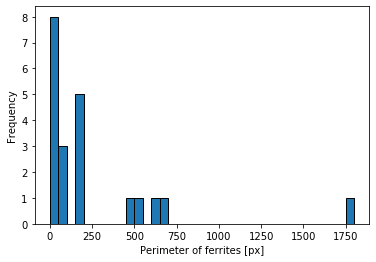

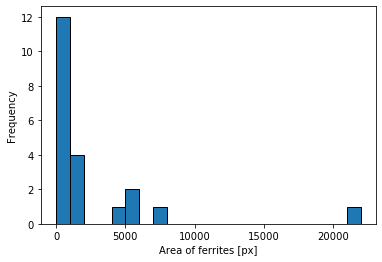

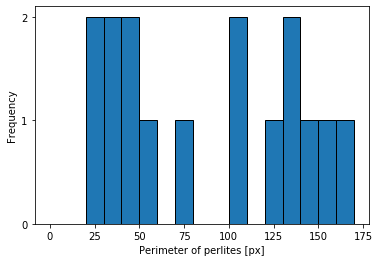

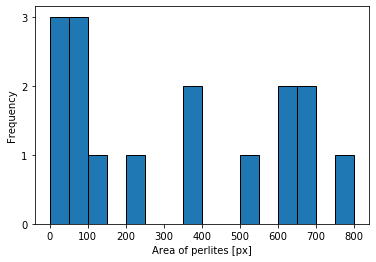

In [23]:
import matplotlib.pyplot as plt
import math

# フェライト ferrite

circum_f = [
    172.56854128837585,
    36.72792184352875,
    46.627416372299194,
    184.9116871356964,
    23.656854152679443,
    49.071067690849304,
    514.0903995037079,
    99.59797894954681,
    696.6416960954666,
    41.79898953437805,
    171.05382299423218,
    181.9238796234131,
    171.5979789495468,
    57.65685415267944,
    32.97056245803833,
    80.62741661071777,
    37.071067690849304,
    627.1025923490524,
    1753.8001991510391,
    22.485281229019165,
    479.56348872184753,
]
area_f = [
    1158.0,
    37.5,
    89.0,
    1387.0,
    22.0,
    74.5,
    4586.5,
    456.0,
    7819.0,
    92.0,
    744.0,
    1238.5,
    1356.0,
    33.0,
    44.0,
    193.0,
    33.5,
    5546.0,
    21699.5,
    19.0,
    5069.0,
]

max_value = math.ceil(max(circum_f))
bins = [i for i in range(0, max_value + 51, 50)]

plt.hist(circum_f, bins=bins, edgecolor="k")
plt.xlabel("Perimeter of ferrites [px]")
plt.ylabel("Frequency")
# plt.title('Histogram of Data')
plt.show()

max_value = math.ceil(max(area_f))
bins = [i for i in range(0, max_value + 1001, 1000)]

plt.hist(area_f, bins=bins, edgecolor="k")
plt.xlabel("Area of ferrites [px]")
plt.ylabel("Frequency")
# plt.title('Histogram of Data')
plt.show()

# パーライト perlite

circum_p = [
    49.55634891986847,
    128.22539567947388,
    136.9533166885376,
    31.313708305358887,
    107.9827550649643,
    29.071067690849304,
    71.69848430156708,
    153.05382251739502,
    103.74011468887329,
    145.2964630126953,
    26.14213538169861,
    44.041630268096924,
    38.14213538169861,
    166.26702547073364,
    131.53910315036774,
    52.14213538169861,
]
area_p = [
    138.5,
    690.0,
    668.5,
    47.0,
    362.5,
    32.5,
    204.5,
    784.0,
    614.0,
    513.5,
    35.0,
    98.5,
    56.0,
    633.5,
    389.0,
    56.0,
]

max_value = math.ceil(max(circum_p))
bins = [i for i in range(0, max_value + 11, 10)]

plt.hist(circum_p, bins=bins, edgecolor="k")
plt.xlabel("Perimeter of perlites [px]")
plt.ylabel("Frequency")
plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))
# plt.title('Histogram of Data')
plt.show()

max_value = math.ceil(max(area_p))
bins = [i for i in range(0, max_value + 51, 50)]

plt.hist(area_p, bins=bins, edgecolor="k")
plt.xlabel("Area of perlites [px]")
plt.ylabel("Frequency")
plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))
# plt.title('Histogram of Data')
plt.show()